# Testing Cases Outline

Here we asses how each texture feature differs across the bernoulli settings. Paragraph reports for each feature and plots; what do they highlight in any sudden patterns out of the randomness (look at certain cases of the samples), how are they affected by bernoulli settings.

## Image Generation
randomly generated 8x8 images using bernoulli iid for each pixel. 
take over 100 samples of images generated for each bernoulli setting and record the mean 
- 0.1
- 0.2
- 0.3
- 0.4
- 0.5
- 0.6
- 0.7
- 0.8
- 0.9 

In [452]:
def create_bernoulli_samples(bernoulli_settings, num_samples=100, size=(8, 8)):
    image_samples = {}
    
    for p in bernoulli_settings:
        samples_list = []
        for i in range(num_samples):
            # FIX: Calls the single-image generation function
            image = (np.random.rand(*size) < p).astype(int)
            samples_list.append(image)
            
        image_samples[p] = samples_list
        
    return image_samples

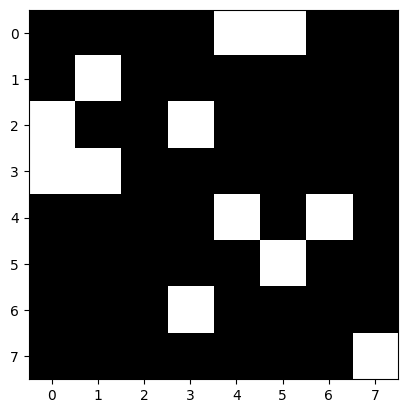

In [442]:
bernoulli_settings = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
dataset = create_bernoulli_samples(bernoulli_settings, num_samples=100)

plt.imshow(dataset[0.2][5], cmap='gray')

## Computing features on generated images

...\
...

In [453]:
def compute_normed_glcm(img):
    glcm0 =graycomatrix(img, distances=[1], angles=[0], levels=2, symmetric=False)
    glcm45 = graycomatrix(img, distances=[1], angles=[np.pi/4], levels=2, symmetric=False)
    glcm90 = graycomatrix(img, distances=[1], angles=[np.pi/2], levels=2, symmetric=False)
    glcm135 = graycomatrix(img, distances=[1], angles=[3 * np.pi/4], levels=2, symmetric=False)

    mean_glcm = (glcm0 + glcm45 + glcm90 + glcm135)/4

    normed_glcm = mean_glcm / np.sum(mean_glcm)

    return normed_glcm 

In [454]:
def compute_samples(bernoulli_settings, num_samples=100, size=(8, 8)):
    image_samples = {}
    sample_features = {}
    
    for p in bernoulli_settings:
        samples_list = []
        features_list = []

        for i in range(num_samples):
            image = (np.random.rand(*size) < p).astype(int)
            samples_list.append(image)

            glcm = compute_normed_glcm(image)
            contrast = graycoprops(glcm, 'contrast')[0,0]
            energy = graycoprops(glcm, 'energy')[0,0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
            correlation = graycoprops(glcm, 'correlation')[0,0]
            # autocorrelation
            # cluster_prominence
            # cluster_shade
            # dissimilarity
            # entropy
            # inverse_difference
            # sum_average
            # sum_entropy
            # sum_of_squares
            # sum_variance
    
            features = [contrast, energy, homogeneity, correlation]
            features_list.append(features)
            
        image_samples[p] = samples_list
        sample_features[p] = features_list
        
    return image_samples, sample_features

## Aggregation and analysis

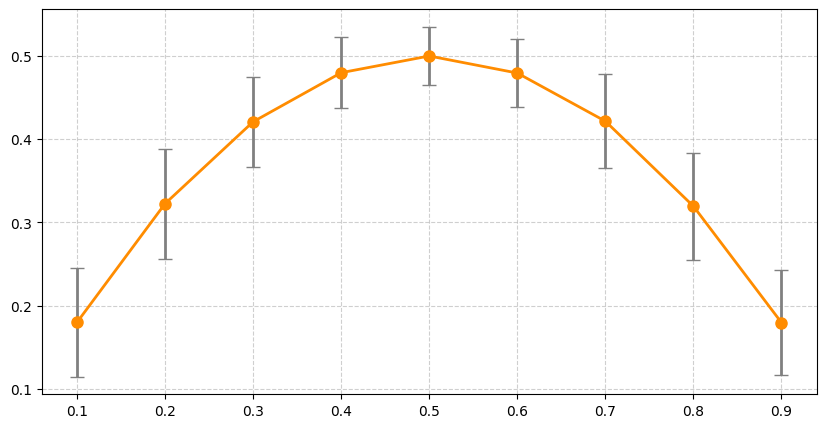

In [455]:
BERNOULLI_SETTINGS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
_, sample_features = compute_samples(BERNOULLI_SETTINGS, num_samples = 2000)

avg_contrast = [np.mean([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_contrast = [np.std([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]


# 3. Plot the results
plt.figure(figsize=(10, 5))
# plt.plot(BERNOULLI_SETTINGS, [sample_features[p][0][1] for p in BERNOULLI_SETTINGS], marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
# plt.plot(BERNOULLI_SETTINGS, avg_image_contrast, marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
plt.errorbar(BERNOULLI_SETTINGS, avg_contrast, yerr=std_contrast, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

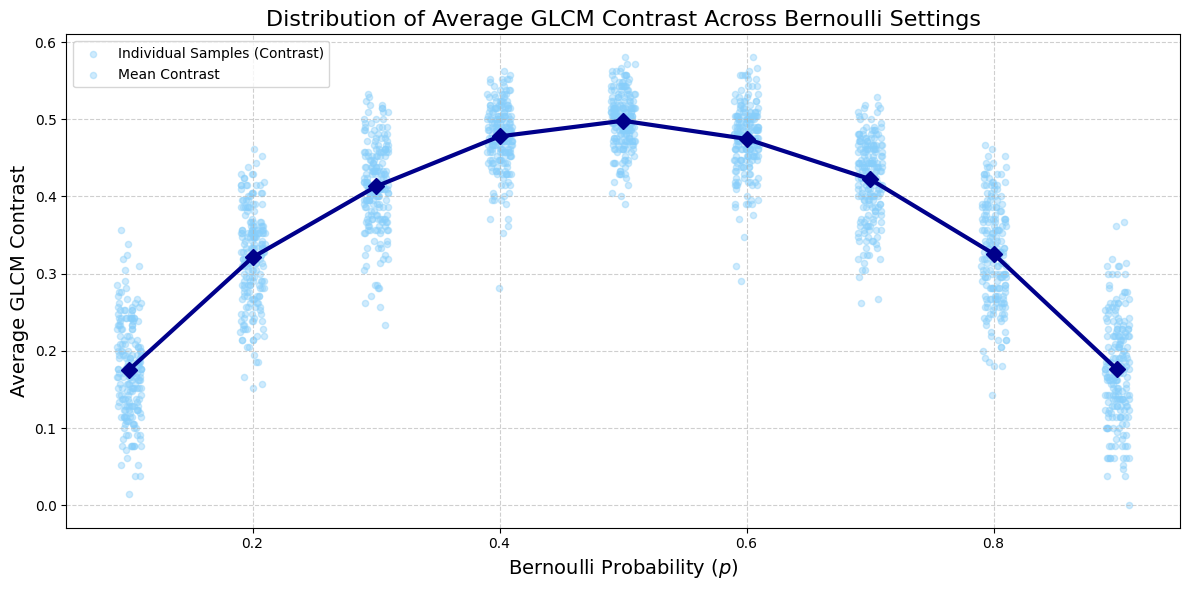

In [456]:
NUM_SAMPLES = 200
_, sample_features = compute_samples(BERNOULLI_SETTINGS, num_samples=NUM_SAMPLES)

# 2. Prepare lists for plotting
all_contrasts = []
mean_contrasts = []
std_devs = []

# 3. Process data for each Bernoulli setting
for p in BERNOULLI_SETTINGS:
    # Convert the list of features for 'p' to a numpy array for easy column extraction
    features_array = np.array(sample_features[p])
    
    # Extract all 100 contrast values (index 0)
    p_contrasts = features_array[:, 0]
    
    # Calculate statistics
    mean_contrasts.append(np.mean(p_contrasts))
    std_devs.append(np.std(p_contrasts))
    
    # Prepare data for the jitter plot (x-values)
    # This creates a list of 100 'p' values slightly offset for visual separation
    jitter_x = p + (np.random.rand(NUM_SAMPLES) * 0.02) - 0.01
    
    # Store the individual points for plotting later
    all_contrasts.append((jitter_x, p_contrasts))

# 4. Create the plot
plt.figure(figsize=(12, 6))

for jitter_x, p_contrasts in all_contrasts:
    plt.scatter(jitter_x, p_contrasts, color='lightskyblue', alpha=0.4, s=20, label='Individual Samples (Contrast)')

plt.plot(BERNOULLI_SETTINGS, mean_contrasts, 
         marker='D', linestyle='-', color='darkblue', linewidth=3, markersize=8, label='Mean Contrast')


# 5. Add titles, labels, and show
plt.title('Distribution of Average GLCM Contrast Across Bernoulli Settings', fontsize=16)
plt.xlabel('Bernoulli Probability ($p$)', fontsize=14)
plt.ylabel('Average GLCM Contrast', fontsize=14)
plt.legend(['Individual Samples (Contrast)', 'Mean Contrast'], loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

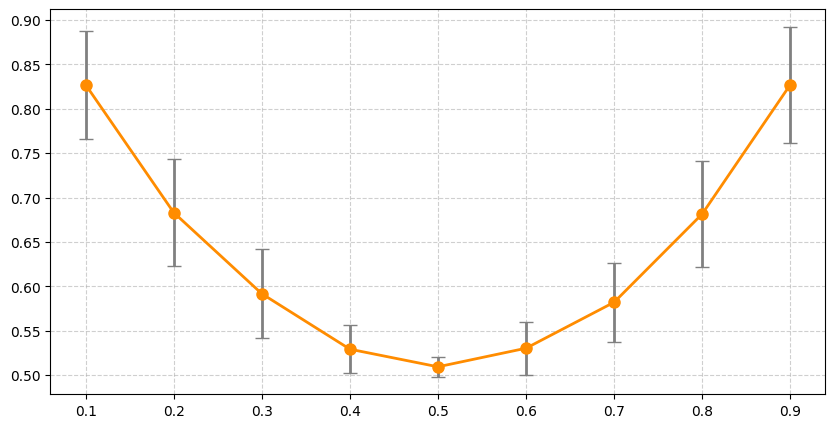

In [457]:
avg_energy = [np.mean([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_energy = [np.std([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_energy, yerr=std_energy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

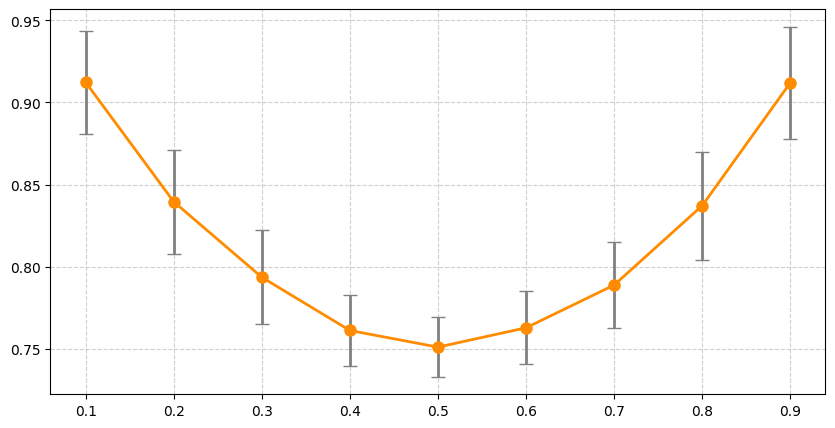

In [458]:
avg_homogeneity = [np.mean([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_homogeneity = [np.std([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_homogeneity, yerr=std_homogeneity, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

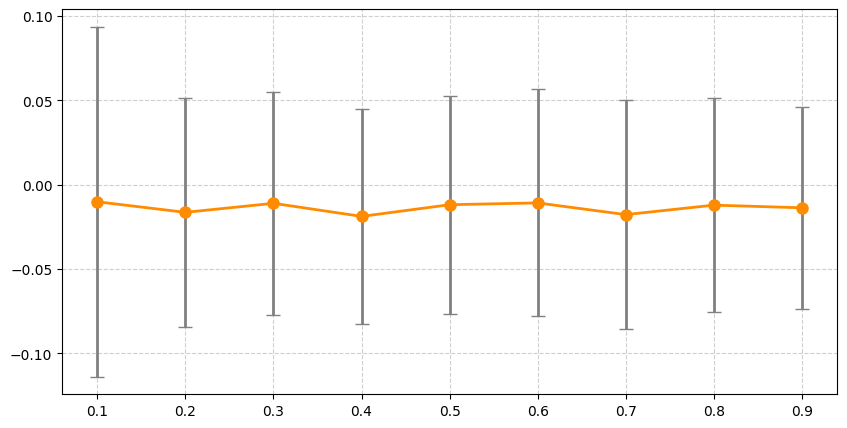

In [512]:
NUM_SAMPLES = 300
_, sample_features = compute_samples(BERNOULLI_SETTINGS, num_samples=NUM_SAMPLES)

avg_correlation = [np.mean([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_correlation = [np.std([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_correlation, yerr=std_correlation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Only noticable differance between the settings was: the 0.1 and 0.9 bernoulli setting were likely to have a higher variance, further examinations are needed. Nevertheless, this difference in mere varianvce of samples dosen't provide much insight unto the feature characteristics. Values range from -0.1 to 0.1, and average around -0.012 (all settings)

### New Features

# Results and Discussion